# CMF Macro Part-2

:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('commodities_with_date.csv')

In [2]:
date = '2019-01-01'
norwgd = int(df[df.Date == date].index[0])
'''Number of Row with given date, will use it to divide dataset'''
norwgd

348

In [3]:
X, y = df.drop(columns=['APSP crude oil($/bbl)', 'Date']), df['APSP crude oil($/bbl)']
X_train, X_test, y_train, y_test = X[X.index < norwgd], X[X.index >= norwgd], y[y.index < norwgd], y[y.index >= norwgd]

# Let's run lightgbm to determine features importance.

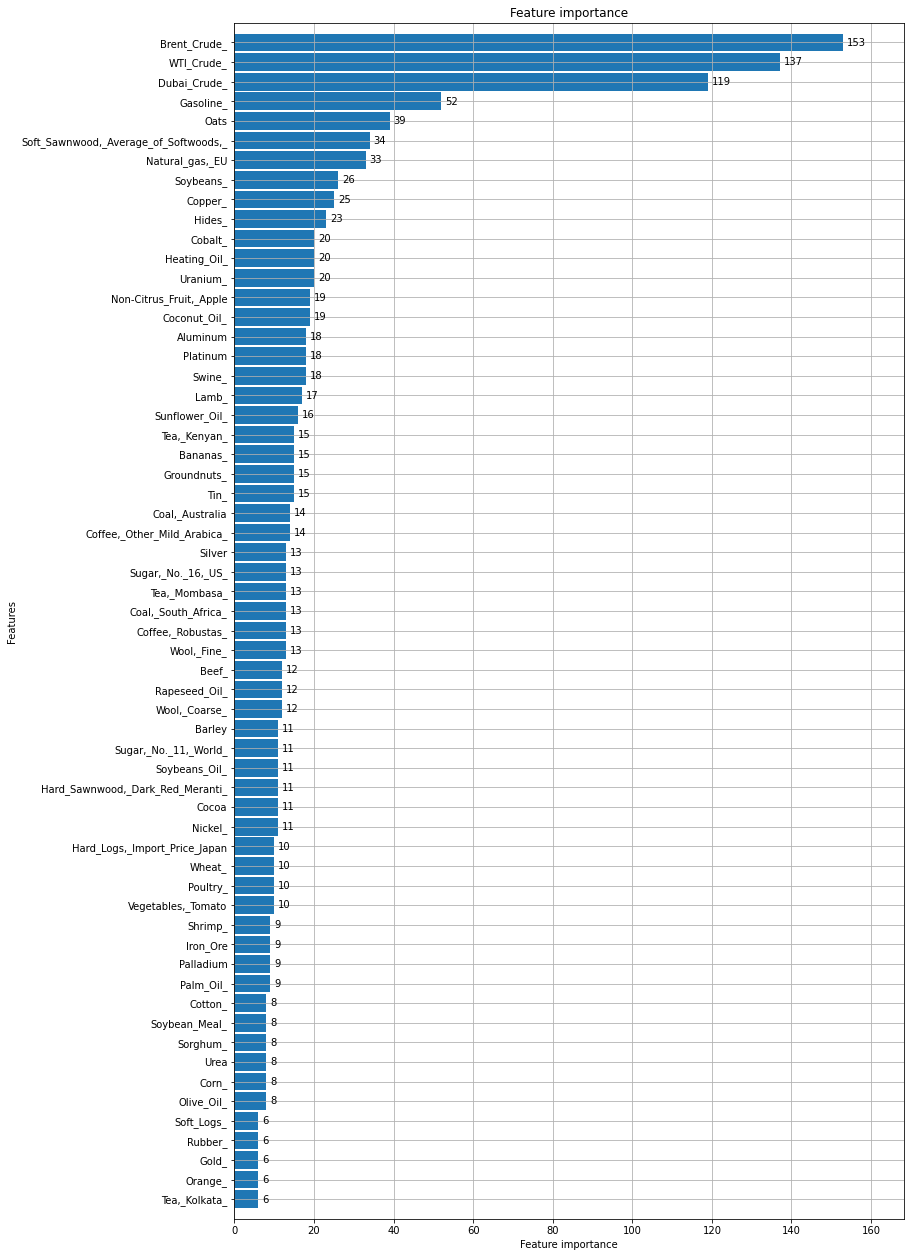

In [4]:
import lightgbm
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(importance_type = 'continuous')

lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

plt.rcParams["figure.figsize"] = (12, 22)
lightgbm.plot_importance(lgbm_model, max_num_features = 60, height=.9)

In [5]:
chosen_features_imp = {'Oats': 39,
                   'Soft Sawnwood, Average of Softwoods, ': 34, 
                   'Soybeans ': 26,
                   'Copper ': 25,
                   'Hides ': 23,
                   'Cobalt ': 20,
                   'Heating Oil ': 20,
                   'Uranium ': 20, 
                   'Non-Citrus Fruit, Apple': 19,
                   'Coconut Oil ': 19, 
                   'Aluminum': 18,
                   'Platinum': 18, 
                   'Swine ': 18,
                   'Lamb ': 17,
                   'Sunflower Oil ': 16,
                   'Tea, Kenyan ': 15, 
                   'Bananas ': 15, 
                   'Groundnuts ': 15,
                   'Tin ': 15,
                   'Coal, Australia': 14, 
                   'Coffee, Other Mild Arabica ': 14, 
                   'Silver': 13,
                   'Sugar, No. 16, US ': 13,
                   'Tea, Mombasa ': 13, 
                   'Coal, South Africa ': 13,
                   'Coffee, Robustas ': 13,
                   'Wool, Fine ': 13,
                   'Beef ': 12, 
                   'Rapeseed Oil ': 12,
                   'Wool, Coarse ': 12, 
                   'Barley': 11,
                   'Sugar, No. 11, World ': 11,
                   'Soybeans Oil ': 11,
                   'Hard Sawnwood, Dark Red Meranti ': 11,
                   'Cocoa': 11,
                   'Nickel ': 11,
                   'Hard Logs, Import Price Japan': 10, 
                   'Wheat ': 10,
                   'Poultry ': 10,
                   'Vegetables, Tomato': 10, 
                   'Shrimp ': 9,
                   'Iron Ore': 9,
                   'Palladium': 9, 
                   'Palm Oil ': 9,
                   'Cotton ': 8, 
                   'Soybean Meal ': 8, 
                   'Sorghum ': 8,
                   'Urea': 8, 
                   'Corn ': 8, 
                   'Olive Oil ': 8,
                   'Soft Logs ': 6, 
                   'Rubber ': 6,
                   'Gold ': 6, 
                   'Orange ': 6,
                   'Tea, Kolkata ': 6
                   }

# Now will perform T-test and F-test

In [18]:
# F-test

from scipy.stats import f


def f_test(x, y, alpha=0.05):
    x, y = np.array(x), np.array(y)

    f_value = np.var(x, ddof=1) / np.var(y, ddof=1)
    p_value = f.cdf(f_value, x.size-1, y.size-1)
    regect = p_value < alpha

    return p_value, f_value, regect

In [19]:
# T-test

import scipy.stats as stats
from scipy.stats import ttest_ind
 
 
def t_test(x, y, alpha=0.05):
  x_var = np.var(x)
  y_var = np.var(y)

  if max(x_var, y_var) / min(x_var, y_var) < 4:
    t_value, p_value = ttest_ind(x, y, equal_var=True)
  else:
    t_value, p_value = ttest_ind(x, y, equal_var=False)

    regect = p_value < alpha

    return p_value, t_value, regect

In [31]:
i = 'Aluminum'
t_test(df['APSP crude oil($/bbl)'], df[i])[-1]

True

In [42]:
chosen_features2 = []
# feauteres which satisfy T-test, F-test, and have lightgbm importance >= 10


for i in list(chosen_features_imp.keys()):
  if chosen_features_imp[i] >= 10:
    if (t_test(df['APSP crude oil($/bbl)'], df[i]) is None) or (t_test(df['APSP crude oil($/bbl)'], df[i]) != None 
                                                                and not t_test(df['APSP crude oil($/bbl)'], df[i])[-1] ):
      if not f_test(df['APSP crude oil($/bbl)'], df[i])[-1]:

        chosen_features2.append(i)

print(chosen_features2)

['Hides ', 'Uranium ', 'Swine ', 'Lamb ', 'Coffee, Robustas ', 'Poultry ']


# Additionally let's impliment a Variance Inflation Factor application (VIF Score)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def run_vif(df):
  vif = pd. DataFrame()
  vif['features'] = df.columns

  vif['vif'] =  [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return(vif)

In [49]:
run_vif(df[chosen_features2]).sort_values(by=['vif'])

,features,vif
1,Uranium,4.003692
5,Poultry,12.019783
4,"Coffee, Robustas",13.976314
3,Lamb,17.993315
2,Swine,20.740740
0,Hides,22.985027


In [52]:
print(df[['APSP crude oil($/bbl)', 'Swine ']].corr())
print(df[['APSP crude oil($/bbl)', 'Hides ']].corr())

                       APSP crude oil($/bbl)    Swine 
APSP crude oil($/bbl)               1.000000  0.405383
Swine                               0.405383  1.000000
                       APSP crude oil($/bbl)    Hides 
APSP crude oil($/bbl)               1.000000 -0.031178
Hides                              -0.031178  1.000000


Since, correlation of Swine and Target higher than between Hides and Crude, Swine will remain. Let's run VIF again.

In [56]:
run_vif(df[['Uranium ', 'Swine ', 'Lamb ', 'Coffee, Robustas ', 'Poultry ']])

,features,vif
0,Uranium,3.602549
1,Swine,15.335815
2,Lamb,13.090992
3,"Coffee, Robustas",9.895261
4,Poultry,10.329726


Swine is still more than 10, let's get rid of it.

In [57]:
run_vif(df[['Uranium ', 'Lamb ', 'Coffee, Robustas ', 'Poultry ']])

,features,vif
0,Uranium,3.526962
1,Lamb,8.060172
2,"Coffee, Robustas",9.223281
3,Poultry,9.219645


In [59]:
df[['Uranium ', 'Lamb ', 'Coffee, Robustas ', 'Poultry ']].corr()

,Uranium,Lamb,"Coffee, Robustas",Poultry
Uranium,1.000000,0.336312,0.404790,0.360951
Lamb,0.336312,1.000000,-0.118536,-0.045039
"Coffee, Robustas",0.404790,-0.118536,1.000000,0.407062
Poultry,0.360951,-0.045039,0.407062,1.000000


# The next step is data prediction.
1. Linear legression.

In [67]:
df_chosen2 = df[['Uranium ', 'Lamb ', 'Coffee, Robustas ', 'Poultry ']]

In [68]:
X, y = df[['Uranium ', 'Lamb ', 'Coffee, Robustas ', 'Poultry ']], df['APSP crude oil($/bbl)']
X_train, X_test, y_train, y_test = X[X.index < norwgd], X[X.index >= norwgd], y[y.index < norwgd], y[y.index >= norwgd]

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [70]:
y_pred = lin_reg.predict(X_test)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape

((348, 4), (46, 4), (348,), (46,), (46,))

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


print("R2:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R2: 0.16424671451356254
MAPE: 0.27659548231379666


2. Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

In [77]:
print("R2:", r2_score(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R2: -0.40962697675375837
MAPE: 0.40345644928973884


Thus, it's no brainer to rely more on regression than on boosting this time.

In [ ]:
# Seasonality and trends

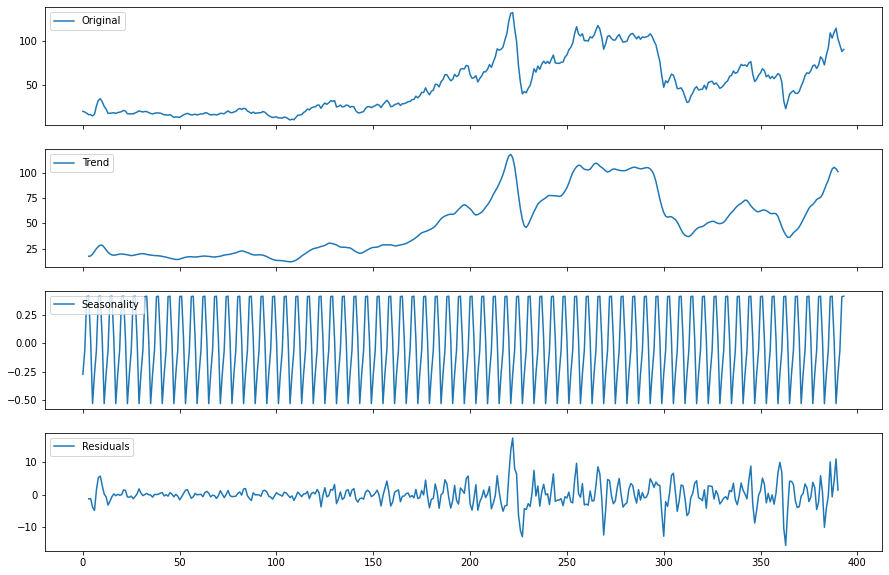

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive = df['APSP crude oil($/bbl)']

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');